In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Import CSV

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

## Check out the data

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

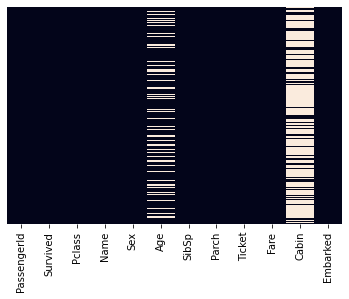

In [5]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

#we can average fill the missing fields for age. 
#but cabin seem to have too many missing information, we might need to drop the column.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

#a few columns i'm interested to explore if it affects survivability is:
    #fare 
    #sibsp
    #parch
    #age

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

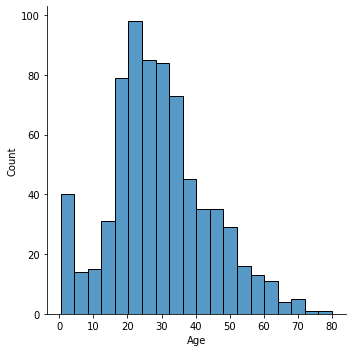

In [8]:
sns.displot(data = train, x = 'Age')

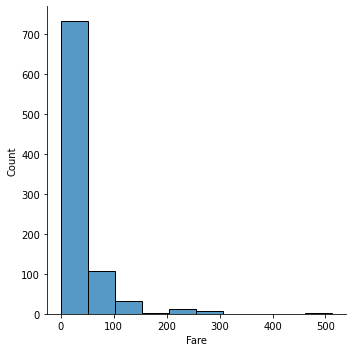

In [9]:
sns.displot(data = train, x = 'Fare', bins = 10)

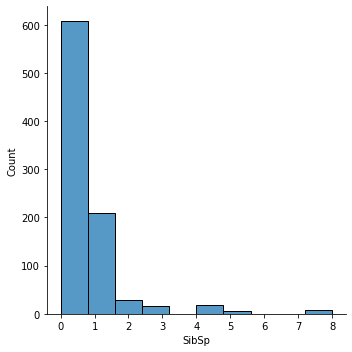

In [10]:
sns.displot(data = train, x = 'SibSp', bins = 10)

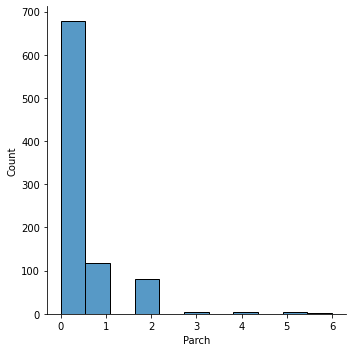

In [11]:
sns.displot(data = train, x = 'Parch')

In [12]:
pd.pivot_table(data = train, index = 'Survived', values = ['Age', 'Fare', 'SibSp', 'Parch'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [13]:
#Preliminary look at the data we deduce: 
    #Age is normally distributed. 
    #Bulk of the passengers paid for a cheaper ticket. 
    #Bulk of the passengers don't have any siblings or spouse. 
    #Bulk of the passengers don't have parent or child. 

## Clean the data

<AxesSubplot:>

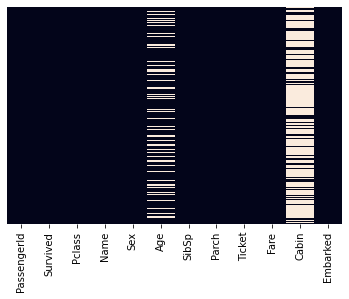

In [14]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

#fill the missing fields for age with average.
#but cabin seem to have too many missing information, we to drop the column.

In [15]:
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [16]:
train.drop('Cabin', axis = 1, inplace = True)

<AxesSubplot:>

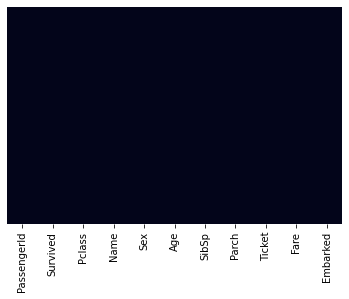

In [17]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

## Feature engineering and first look at most correlated features

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
#lets see if the title of passengers affect survivability

train['title'] = train.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [20]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,Mr


In [21]:
pd.pivot_table(data = train, index = 'Survived', columns = 'title', values = 'Age', aggfunc = 'count')

title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [22]:
#the captain of the ship did not survive. We can assume that he tried his best to get passengers off before himself.
#col, major, sir - military personnels are more likely to survive.
#doctors are also very likely to survive (3/4)
#the only countess onboard survived. She was later praised for helping row the safety craft to a rescue ship.
#most passengers fall into the Miss, Mr, and Mrs categories. Of which, male title (Mr) is the most likely not to survive

#so yes, title has a correlation to survivability

<AxesSubplot:xlabel='Survived', ylabel='count'>

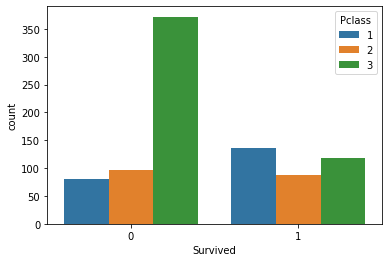

In [23]:
#lets see if the class of passengers affect survivability

sns.countplot(data = train, x = 'Survived', hue = 'Pclass')

#3rd class passengers will most likely not survive.

In [24]:
#lets see if the age of passengers affect survivability

bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['age_range'] = pd.cut(train.Age.astype(np.int64), bins, labels = labels, include_lowest = True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

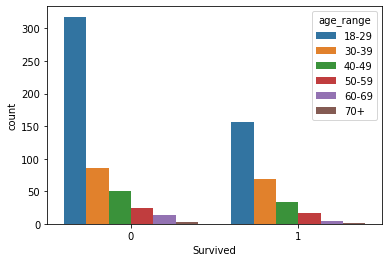

In [25]:
sns.countplot(data = train, x = 'Survived', hue = 'age_range')

In [26]:
train.age_range.value_counts()

18-29    475
30-39    155
40-49     84
50-59     42
60-69     18
70+        4
Name: age_range, dtype: int64

In [27]:
#in both categories: survived and did not survive, the majority are aged 18-29.
#in both categories: slowly trickles down in count as the age range increases.
#this is becos most passengers are aged 18-29. Naturally, this would result in both categories having the same distribution.
#no conclusive result can be derived.
#not used.

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,18-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,18-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30-39


## Clean up test dataset

In [29]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,18-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30-39


In [30]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


<AxesSubplot:>

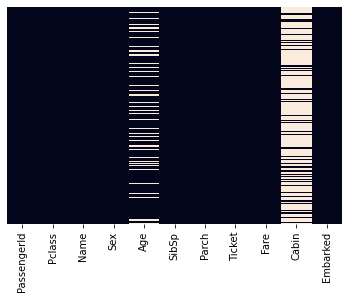

In [31]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False)

In [32]:
test.drop('Cabin', axis = 1, inplace = True)

In [33]:
test['Age'].fillna(train['Age'].mean(), inplace = True)

In [34]:
test['title'] = test.Name.apply(lambda x : x.split(',')[1].split('.')[0].strip())

In [35]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
test['age_range'] = pd.cut(test.Age.astype(np.int64), bins, labels = labels, include_lowest = True)

In [36]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,age_range
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,Q,Mr,30-39
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,S,Mrs,40-49
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,Q,Mr,60-69
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,S,Mr,18-29
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,S,Mrs,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,S,Mr,18-29
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Dona,30-39
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Mr,30-39
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,S,Mr,18-29


<AxesSubplot:>

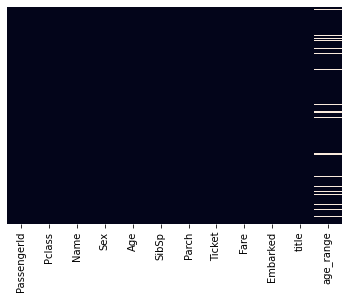

In [37]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False)

In [38]:
#replace the null values with most common age_range - 18 to 29 yo

test.age_range.value_counts()

18-29    245
30-39     56
40-49     45
50-59     21
60-69      9
70+        1
Name: age_range, dtype: int64

In [39]:
test['age_range'].fillna('18-29', inplace = True)

<AxesSubplot:>

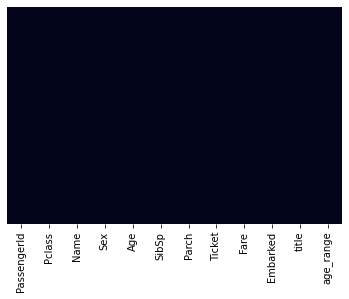

In [40]:
sns.heatmap(test.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:>

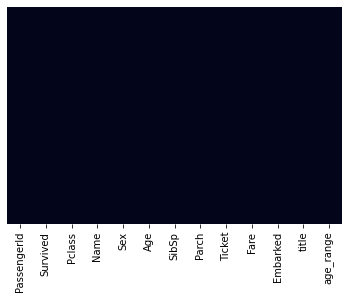

In [41]:
#do the same for train dataset

train['age_range'].fillna('18-29', inplace = True)
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,18-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,18-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,30-39


In [43]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,age_range
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,30-39
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,40-49
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,60-69
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,18-29
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,18-29


In [44]:
train_sex = pd.get_dummies(train['Sex'], drop_first = True) #cos if one column alr have 1 and 0 there is no need for another (1 for male)
test_sex = pd.get_dummies(train['Sex'], drop_first = True)

In [45]:
train_embarked = pd.get_dummies(train['Embarked'])
test_embarked = pd.get_dummies(test['Embarked'])

In [46]:
train_age_range = pd.get_dummies(train['age_range'])
test_age_range = pd.get_dummies(test['age_range'])

In [47]:
train_title = pd.get_dummies(train['title'])
test_title = pd.get_dummies(test['title'])

In [48]:
train = pd.concat([train,train_sex,train_embarked, train_age_range, train_title], axis = 1)
test = pd.concat([test,test_sex,test_embarked, test_age_range, test_title], axis = 1)

In [49]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,0,0,0,1,0,0,0,0,0


## Clean data for modeling

In [50]:
#Multicollinearity is instance where some columns are perfect predictors of other columns
#reduces the precision of the estimated coefficients, 
#which weakens the statistical power of your regression model. 
#You might not be able to trust the p-values to identify independent variables that are statistically significant.

#hence need to drop columns with multicollinearity
#in this case - sex

In [51]:
train.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'title', 'age_range','Fare'], inplace = True, axis =1)
test.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'title', 'age_range','Fare'], inplace = True, axis =1)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,1,0,3,22.0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,38.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,26.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,35.0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,35.0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [53]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,male,C,Q,S,18-29,...,70+,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
0,892.0,3.0,34.5,0.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,893.0,3.0,47.0,1.0,0.0,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,894.0,2.0,62.0,0.0,0.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,895.0,3.0,27.0,0.0,0.0,0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,896.0,3.0,22.0,1.0,1.0,1,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Applying log regression

In [54]:
train['Dona'] = 0 #adding this here becos it is a title present in test set that's missing from train set

In [55]:
x = train.drop('Survived', axis = 1) #remove the independent variable so to train model
y = train['Survived'] #independent variable

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logmodel = LogisticRegression(solver='liblinear')

In [59]:
logmodel.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [60]:
predictions = logmodel.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.832089552238806

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       154
           1       0.86      0.73      0.79       114

    accuracy                           0.83       268
   macro avg       0.84      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [64]:
np.any(np.isnan(test))

True

In [65]:
np.all(np.isfinite(test))


False

In [66]:
test.shape 

#ran into an issue where i cant use trained model on my test dataset cos my pd.get dummies
#resulted in making nan rows which caused errors

(891, 24)

In [67]:
train.shape

(891, 34)

In [68]:
test.dropna(inplace = True)

In [69]:
test.shape

(418, 24)

In [70]:
test.head(1)

,PassengerId,Pclass,Age,SibSp,Parch,male,C,Q,S,18-29,...,70+,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
0,892.0,3.0,34.5,0.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [71]:
train.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S,...,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,Dona
0,1,0,3,22.0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [72]:
#ran into another issue where train dataset has more titles than test data set 
#hence model couldnt run due to test set having 24 features and model expecting 32 cos it was trained on 32
#solution to add empty columns of missing titles

In [73]:
test.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'male', 'C', 'Q', 'S',
       '18-29', '30-39', '40-49', '50-59', '60-69', '70+', 'Col', 'Dona', 'Dr',
       'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'],
      dtype='object')

In [74]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'male',
       'C', 'Q', 'S', '18-29', '30-39', '40-49', '50-59', '60-69', '70+',
       'Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',
       'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir', 'the Countess',
       'Dona'],
      dtype='object')

In [75]:
test['Capt'] = 0
test['Don'] = 0
test['Jonkheer'] = 0
test['Lady'] = 0
test['Major'] = 0
test['Mlle'] = 0
test['Mme'] = 0
test['Sir'] = 0
test['the Countess'] = 0

In [76]:
test_preds = logmodel.predict(test)

In [77]:
test_ids = test["PassengerId"]

In [78]:
submission = pd.DataFrame({"PassengerId":test_ids.values,
                  "Survived":test_preds})

submission['PassengerId'] = submission['PassengerId'].astype(int)


In [79]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,1
416,1308,1


In [80]:
submission.to_csv("submission.csv",index = False)